In [ ]:
%matplotlib inline

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(ride_data, city_data, how='left')

# Display the data table for preview
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

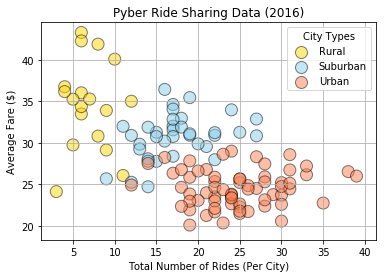

In [137]:
# Obtain the x and y coordinates for each of the three city types
average_fare = combined_data.groupby('city').mean()['fare']
total_numb_ride = combined_data.groupby('city').count()['ride_id']
total_numb_drive = combined_data['driver_count'].mean()
city_type = combined_data[['city', 'type']].drop_duplicates('city').set_index('city')['type']

final_data = pd.DataFrame({'Average Fare': average_fare,'Total Number of Rides': total_numb_ride,'Total Number of Drivers': total_numb_drive,'Type of City': city_type})

final_data.head()

rural = final_data.loc[final_data['Type of City']=='Rural']
urban = final_data.loc[final_data['Type of City']=='Urban']
suburban = final_data.loc[final_data['Type of City']=='Suburban']

axis1 = plt.scatter(rural['Total Number of Rides'],rural['Average Fare'],s=rural['Total Number of Drivers']*5,
                    color = 'gold',edgecolor = 'black', label = 'Rural', alpha = .5)

axis2 = plt.scatter(suburban['Total Number of Rides'],suburban['Average Fare'],s=suburban['Total Number of Drivers']*5,
                    color = 'skyblue',edgecolor = 'black', label = "Suburban", alpha = .5)

axis3 = plt.scatter(urban['Total Number of Rides'],urban['Average Fare'],s=urban['Total Number of Drivers']*5,
                    color = 'coral',edgecolor = 'black', label = "Urban", alpha = .5)

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend(title = 'City Types')

plt.show()

# Build the scatter plots for each city types


# Incorporate the other graph properties


# Create a legend


# Incorporate a text label regarding circle size


# Save Figure



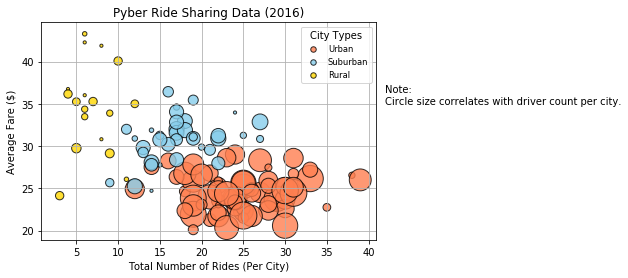

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

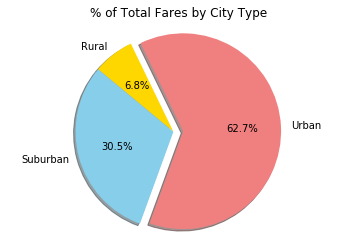

In [117]:
# Calculate Type Percents
total_fares = combined_data["fare"].sum()
urban_fare = combined_data.loc[combined_data["type"] == "Urban", "fare"].sum()/total_fares *100
rural_fare = combined_data.loc[combined_data["type"] == "Rural", "fare"].sum()/total_fares *100
suburban_fare = combined_data.loc[combined_data["type"] == "Suburban", "fare"].sum()/total_fares *100

labels = 'Urban', 'Rural', 'Suburban'
sizes = [urban_fare_p, rural_fare_p, suburban_fare_p]
explode = (0.1, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%.1f%%',
        shadow=True, startangle=250, colors = ["lightcoral", "gold", "skyblue"])
ax1.axis('equal') 
plt.title("% of Total Fares by City Type")

plt.show()
# Build Pie Chart

# Save Figure


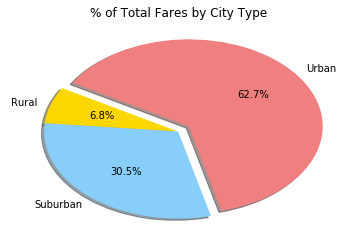

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

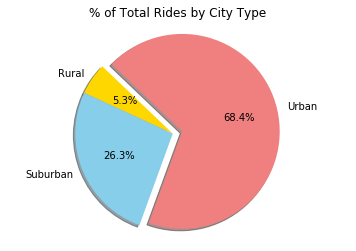

In [120]:
# Calculate Ride Percents
total_rides = len(combined_data)
urban_rides = combined_data.loc[combined_data["type"] == "Urban", "ride_id"].count()/total_rides * 100
rural_rides = combined_data.loc[combined_data["type"] == "Rural", "ride_id"].count()/total_rides * 100
suburban_rides = combined_data.loc[combined_data["type"] == "Suburban", "ride_id"].count()/total_rides * 100


labels = 'Urban', 'Rural', 'Suburban'
sizes = [urban_rides, rural_rides, suburban_rides]
explode = (0.1, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=250, colors = ["lightcoral", "gold", "skyblue"])
ax1.axis('equal')  
plt.title("% of Total Rides by City Type")

plt.show()

# Build Pie Chart

# Save Figure


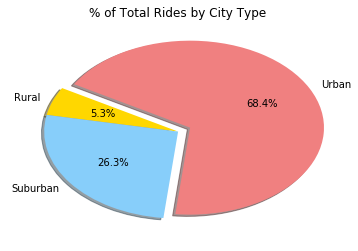

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [133]:
total_drivers = final_data["Total Number of Drivers"].sum()
total_drivers

3471.6126315789465

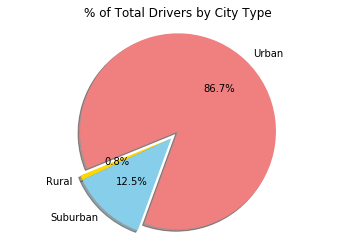

In [127]:
# Calculate Driver Percents
total_drivers = combined_data["driver_count"].sum()
urban_drivers = combined_data.loc[combined_data["type"] == "Urban", "driver_count"].sum()/total_drivers * 100
rural_drivers = combined_data.loc[combined_data["type"] == "Rural", "driver_count"].sum()/total_drivers * 100
suburban_drivers = combined_data.loc[combined_data["type"] == "Suburban", "driver_count"].sum()/total_drivers * 100

labels = 'Urban', 'Rural', 'Suburban'
sizes = [urban_drivers, rural_drivers, suburban_drivers]
explode = (0.1, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=250, colors = ["lightcoral", "gold", "skyblue"])
ax1.axis('equal')
plt.title("% of Total Drivers by City Type")

plt.show()

# Build Pie Charts

# Save Figure


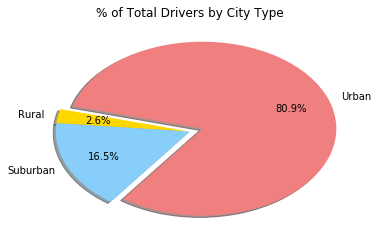

In [6]:
# Show Figure
plt.show()